# phase 2 collection map
- in vector ops temporarily as my paper rep isn't working
- what level do we want the map at
    - population
    - country
    - location
    - site
- will require some averaging of lat/lons

In [6]:
%run ../agam-report-base/src/python/ag1k/phase2_ar1.py
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy; print('cartopy', cartopy.__version__)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import seaborn as sns

cartopy 0.16.0


In [7]:
df_meta = pd.read_csv('../meta/ag1000g/phase2_samples.meta.txt', sep='\t')
df_meta.columns

Index(['ox_code', 'src_code', 'population', 'country', 'location', 'site',
       'contributor', 'contact', 'year', 'm_s', 'sex', 'n_sequences',
       'mean_coverage', 'ebi_sample_acc', 'latitude', 'longitude'],
      dtype='object')

In [8]:
df_meta

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0051-C,Twifo_Praso__C1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,99910300,33.33,ERS311871,5.60858,-1.54926
3,AA0052-C,Twifo_Praso__F2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,100899280,32.29,ERS311879,5.60858,-1.54926
4,AA0053-C,Twifo_Praso__A4,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,104791234,34.14,ERS311887,5.60858,-1.54926
5,AA0063-C,Twifo_Praso__D1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,90062282,29.33,ERS311872,5.60858,-1.54926
6,AA0064-C,Twifo_Praso__G2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,100028190,31.61,ERS311880,5.60858,-1.54926
7,AA0075-C,Twifo_Praso__F1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,98566392,31.67,ERS311873,5.60858,-1.54926
8,AA0076-C,Twifo_Praso__B3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,92182496,29.91,ERS311881,5.60858,-1.54926
9,AA0077-C,Twifo_Praso__C4,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,89362286,27.69,ERS311889,5.60858,-1.54926


In [9]:
#lets look at the different levels of granularity in site
#historically we have looked at the population level
df_meta.population.unique()

array(['GHcol', 'GHgam', 'BFgam', 'BFcol', 'UGgam', 'GM', 'GW', 'KE',
       'CMgam', 'FRgam', 'GQgam', 'AOcol', 'GAgam', 'GNgam', 'GNcol',
       'CIcol'], dtype=object)

In [10]:
#get an average lonlat for each pop
pop_nm = df_meta.population.unique()
pop_lon = [np.mean(df_meta[df_meta.population == p].longitude.unique()) for p in pop_nm]
pop_lat = [np.mean(df_meta[df_meta.population == p].latitude.unique()) for p in pop_nm]

#get the number of samples in each pop
pop_num = [df_meta[df_meta.population == p].shape[0] for p in pop_nm]

In [11]:
#make data frame for ease of adjusting offsets
df = pd.DataFrame()
df['pop'] = pop_nm
df['lon'] = pop_lon 
df['lat'] = pop_lat
df['num'] = pop_num
df.head()

,pop,lon,lat,num
0,GHcol,-0.95086,5.570932,55
1,GHgam,-0.21928,5.668490,12
2,BFgam,-4.41400,11.206000,92
3,BFcol,-4.41400,11.206000,75
4,UGgam,34.02600,0.770000,112


In [12]:
#make lonlat offsets, label position exceptions and make a single average lonlat for Ghana/Guinea
df['offset_lon'] = np.zeros(len(df))
df['offset_lat'] = np.zeros(len(df))
df['label'] = 'bottom'
df.loc[df['pop'] == 'BFgam', 'offset_lat'] = 2
df.loc[df['pop'] == 'BFgam', 'offset_lon'] = 2
df.loc[df['pop'] == 'BFcol', 'offset_lat'] = 2
df.loc[df['pop'] == 'BFcol', 'offset_lon'] = -2

df.loc[df['pop'] == 'GHgam', 'offset_lat'] = -2
df.loc[df['pop'] == 'GHgam', 'offset_lon'] = 2
df.loc[df['pop'] == 'GHcol', 'offset_lat'] = -2
df.loc[df['pop'] == 'GHcol', 'offset_lon'] = -2
df.loc[df['pop'] == 'GHcol', 'label'] = 'top'
df.loc[df['pop'] == 'GHgam', 'label'] = 'top'

df.loc[df['pop'] == 'GAgam', 'label'] = 'top'

df.loc[df['pop'] == 'GM', 'offset_lat'] = -1
df.loc[df['pop'] == 'GM', 'offset_lon'] = -3

df.loc[df['pop'] == 'GW', 'offset_lat'] = -2
df.loc[df['pop'] == 'GW', 'offset_lon'] = -2 
df.loc[df['pop'] == 'GW', 'label'] = 'top'

df.loc[df['pop'] == 'FRgam', 'offset_lat'] = 2
df.loc[df['pop'] == 'FRgam', 'offset_lon'] = -1

df.loc[df['pop'] == 'GNgam', 'offset_lat'] = 2
df.loc[df['pop'] == 'GNgam', 'offset_lon'] = -1
#df.loc[df['pop'] == 'GNgam', 'label'] = 'top'


df.loc[df['pop'] == 'GNcol', 'offset_lat'] = -2
df.loc[df['pop'] == 'GNcol', 'offset_lon'] = -1 
df.loc[df['pop'] == 'GNcol', 'label'] = 'top'

df.loc[df['pop'] == 'GHcol', 'lon'] = np.mean(df_meta[df_meta.country == 'Ghana'].longitude.unique())
df.loc[df['pop'] == 'GHgam', 'lon'] = np.mean(df_meta[df_meta.country == 'Ghana'].longitude.unique())
df.loc[df['pop'] == 'GHcol', 'lat'] = np.mean(df_meta[df_meta.country == 'Ghana'].latitude.unique())
df.loc[df['pop'] == 'GHgam', 'lat'] = np.mean(df_meta[df_meta.country == 'Ghana'].latitude.unique())


df.loc[df['pop'] == 'GNcol', 'lon'] = np.mean(df_meta[df_meta.country == 'Guinea'].longitude.unique())
df.loc[df['pop'] == 'GNgam', 'lon'] = np.mean(df_meta[df_meta.country == 'Guinea'].longitude.unique())
df.loc[df['pop'] == 'GNcol', 'lat'] = np.mean(df_meta[df_meta.country == 'Guinea'].latitude.unique())
df.loc[df['pop'] == 'GNgam', 'lat'] = np.mean(df_meta[df_meta.country == 'Guinea'].latitude.unique())

In [13]:
df

,pop,lon,lat,num,offset_lon,offset_lat,label
0,GHcol,-0.950860,5.570932,55,-2.0,-2.0,top
1,GHgam,-0.950860,5.570932,12,2.0,-2.0,top
2,BFgam,-4.414000,11.206000,92,2.0,2.0,bottom
3,BFcol,-4.414000,11.206000,75,-2.0,2.0,bottom
4,UGgam,34.026000,0.770000,112,0.0,0.0,bottom
5,GM,-15.900000,13.550000,65,-3.0,-1.0,bottom
6,GW,-15.615611,11.923944,91,-2.0,-2.0,top
7,KE,39.801500,-3.748500,48,0.0,0.0,bottom
8,CMgam,13.948000,4.955000,297,0.0,0.0,bottom
9,FRgam,45.128881,-12.816509,24,-1.0,2.0,bottom


In [14]:
#add long names for legend.
long_nm = ['Ghana $coluzzii$ (n=55)', 'Ghana $gambiae$ (n=12)', 'Burkina Faso $gambiae$ (n=92)', 'Burkina Faso $coluzzii$ (n=75)', 
           'Uganda $gambiae$ (n=112)', 'Gambia (n=65)', 'Guinea Bissau (n=91)', 'Kenya (n=48)', 'Cameroon $gambiae$ (n=297)', 'Mayotte island $gambiae$ (n=24)',
           'Bioko island $gambiae$ (n=9)', 'Angola $coluzzii$ (n=78)', 'Gabon $gambiae$ (n=69)', 'Guinea $gambiae$ (n=40)', 'Guinea $coluzzii$ (n=4)',
          "Cote d'Ivoire $coluzzii$ (n=71)"]

In [15]:
df['long'] = long_nm
df

,pop,lon,lat,num,offset_lon,offset_lat,label,long
0,GHcol,-0.950860,5.570932,55,-2.0,-2.0,top,Ghana $coluzzii$ (n=55)
1,GHgam,-0.950860,5.570932,12,2.0,-2.0,top,Ghana $gambiae$ (n=12)
2,BFgam,-4.414000,11.206000,92,2.0,2.0,bottom,Burkina Faso $gambiae$ (n=92)
3,BFcol,-4.414000,11.206000,75,-2.0,2.0,bottom,Burkina Faso $coluzzii$ (n=75)
4,UGgam,34.026000,0.770000,112,0.0,0.0,bottom,Uganda $gambiae$ (n=112)
5,GM,-15.900000,13.550000,65,-3.0,-1.0,bottom,Gambia (n=65)
6,GW,-15.615611,11.923944,91,-2.0,-2.0,top,Guinea Bissau (n=91)
7,KE,39.801500,-3.748500,48,0.0,0.0,bottom,Kenya (n=48)
8,CMgam,13.948000,4.955000,297,0.0,0.0,bottom,Cameroon $gambiae$ (n=297)
9,FRgam,45.128881,-12.816509,24,-1.0,2.0,bottom,Mayotte island $gambiae$ (n=24)


In [16]:
np.sum(list(df.num))

1142

# map fun

In [17]:
#colour order?
pop_col = ['GHcol', 'BFcol', 'AOcol', 'GNcol', 'CIcol', 'GHgam', 'BFgam', 'UGgam', 'CMgam', 
           'FRgam', 'GQgam', 'GAgam', 'GNgam', 'GM', 'GW', 'KE']

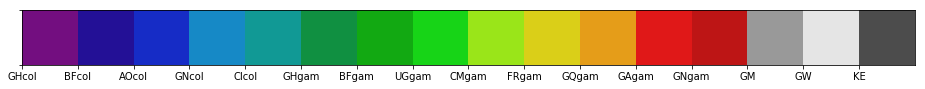

In [18]:
palette = sns.color_palette('nipy_spectral', n_colors=df.shape[0] -3, desat=0.8)
# add a colour for other_resistant
palette.append((0.6, 0.6, 0.6))
# add a colour for wt 
palette.append((0.9, 0.9, 0.9))
palette.append((0.3, 0.3, 0.3))
# check
sns.palplot(palette)
plt.gca().set_xticklabels(pop_col);

In [19]:
pop_col

['GHcol',
 'BFcol',
 'AOcol',
 'GNcol',
 'CIcol',
 'GHgam',
 'BFgam',
 'UGgam',
 'CMgam',
 'FRgam',
 'GQgam',
 'GAgam',
 'GNgam',
 'GM',
 'GW',
 'KE']

In [20]:
col_dict = {p:c for p,c in zip(pop_col, palette)}

In [21]:
crs_lonlat = ccrs.PlateCarree()
ratios = np.asarray([0.5, 0.5])
sum(ratios)

1.0

In [22]:
def plot_map(fn=None, dpi=150):

    #our frame
    extent_lonlat = (-26, 47, -20, 18)

    #plot
    subplot_kw = dict(projection=crs_lonlat)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=120, subplot_kw=subplot_kw)
    ax.coastlines(resolution='50m', linewidth=1, zorder=1)
    ax.stock_img()
    ax.add_feature(cfeature.BORDERS, lw=1)
    ax.add_feature(cfeature.LAKES, zorder=2)
    #ax.margins(0)
    ax.set_extent(extent_lonlat, crs=crs_lonlat)

    for pop, lat, lon, offset_lat, offset_lon, num, pos in zip(list(df['pop']), list(df.lat), list(df.lon), list(df.offset_lat), list(df.offset_lon), list(df.num), list(df.label)):
        centre = (lon + offset_lon, lat + offset_lat)
        if num < 25:
            radius = 0.5
        elif num < 50:
            radius = 0.75
        elif num < 75:
            radius = 1
        elif num < 100:
            radius = 1.25
        elif num < 125:
            radius = 1.50
        else:
            radius = 2
        ax.add_patch(plt.Circle(xy=centre, radius=radius, edgecolor='k', facecolor=pop_colors[pop], zorder=7))
        
        if offset_lat != 0 or offset_lon != 0:
            ax.plot([lon, lon + offset_lon],
                    [lat, lat + offset_lat], 'k-', lw=1)
        
        lbl = pop
        if pos == 'bottom':
            ax.text(centre[0], centre[1] + radius, lbl, ha='center', va='bottom', fontsize=7, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)
        if pos == 'top':
            ax.text(centre[0], centre[1] - radius, lbl, ha='center', va='top', fontsize=7, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)

            
    handles = [mpl.patches.Patch(facecolor=pop_colors[k], edgecolor='k', label=df[df['pop'] == k].long.values[0]) for k in list(pop_col)]
    #handles = [mpl.patches.Patch(facecolor=hap_colors[k], edgecolor='k', label=human_hap_labels[k]) for k in hap_label
    leg = ax.legend(handles=handles, bbox_to_anchor=(0.0, 0.445), loc='upper left', title='Population', ncol=2, fontsize=7 )
    leg._legend_box.align = "center"
    
#     patches = plt.plot([],[], marker="o", ms=20, ls="", mec=None, color='k', 
#                          label="test" )
#     leg2 = ax.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
#                      loc='center left', ncol=2, facecolor="white", numpoints=1 )
#     leg2._legend_box.align = 'left'    
#     plt.gca().add_artist(leg)  
    if fn:
        fig.savefig(fn, jpeg_quality=100, dpi=dpi, bbox_inches='tight')

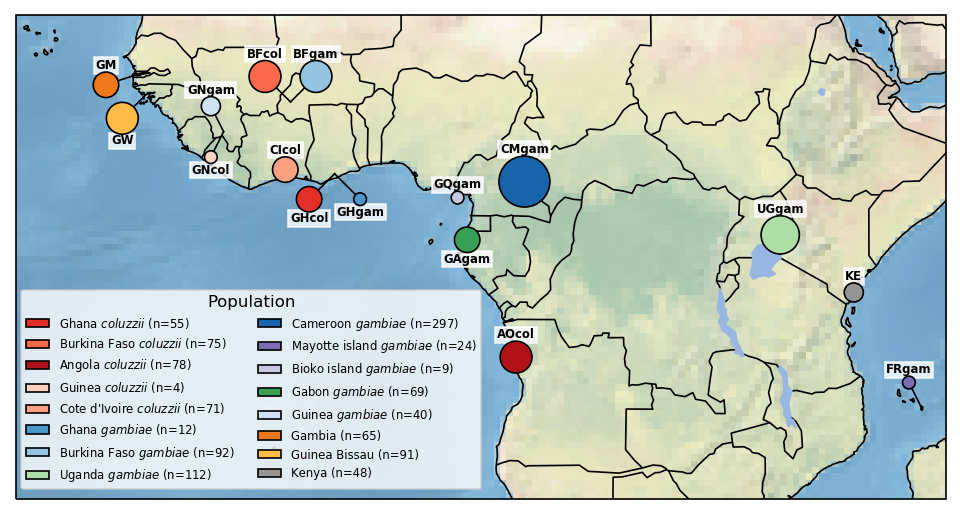

In [23]:
# plot_map(fn='phase_2_test_map.jpg')

## Let's try using the ecosystem layer from phase 1
http://www.aag.org/cs/publications/special/map_african_ecosystems

In [24]:
import humanize
from humanize import naturalsize, intcomma, intword

In [25]:
import os
import gdal
import ogr
import osr
import gdalnumeric
import gdalconst

In [26]:
from osgeo import osr, gdal

In [27]:
gdal.__version__

'2.2.3'

In [28]:
#downloaded data from http://rmgsc.cr.usgs.gov/outgoing/ecosystems/AfricaData/
data_dir = '/home/chris/data/Africa_IVC/'

In [29]:
!ls -hal {data_dir}

total 904M
drwxrwxr-x 2 chris chris 4.0K Nov 22 12:52 .
drwxrwxrwx 6 chris chris 4.0K Nov 21 16:04 ..
-rwxrwxrwx 1 chris chris   82 Mar 20  2013 Africa_IVC_20130316_final_MG.tfw
-rwxrwxrwx 1 chris chris 643M Mar 20  2013 Africa_IVC_20130316_final_MG.tif
-rwxrwxrwx 1 chris chris  50K Mar 20  2013 Africa_IVC_20130316_final_MG_tif_arc10_1.lyr
-rwxrwxrwx 1 chris chris  49K Apr  2  2013 Africa_IVC_20130316_final_MG_tif_arc10.lyr
-rwxrwxrwx 1 chris chris  476 Apr  2  2013 Africa_IVC_20130316_final_MG.tif.aux.xml
-rwxrwxrwx 1 chris chris 260M Apr  2  2013 Africa_IVC_20130316_final_MG.tif.ovr
-rw-rw-r-- 1 chris chris  45K Nov 23 09:31 Africa_IVC_20130316_final_MG.tif.vat.csv
-rwxrwxrwx 1 chris chris 393K Mar 20  2013 Africa_IVC_20130316_final_MG.tif.vat.dbf
-rwxrwxrwx 1 chris chris 3.1K Mar 27  2013 Africa_IVC_20130316_final_MG.tif.xml
-rwxrwxrwx 1 chris chris 9.1K Mar 27  2013 Africa_IVC_20130316_final_MG.xml
-rwxrwxrwx 1 chris chris  69K Mar 23  2013 African and Malagasy Veg_Macrogroups_2013

In [30]:
#geoTIFF
dataset = gdal.Open(os.path.join(data_dir, 'Africa_IVC_20130316_final_MG.tif'))

In [31]:
dataset

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f98a87d31e0> >

In [32]:
#what spatial reference system has been used?
proj_wkt = dataset.GetProjection()
#wkt = Well Known Text markup language for representing vector geometry on a map.
print(proj_wkt)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]


In [33]:
#conver wkt into spatial reference object
proj = osr.SpatialReference()
proj.ImportFromWkt(proj_wkt)
print(proj)

GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]


In [34]:
#find image boundaries
geo_transform = dataset.GetGeoTransform()
geo_transform
#these numbers define the transformation from pixel raster space to coordinate space.
#of 2 and 4 are zero then image is 'north up'...

(-26.00013888888887,
 0.0008333333333,
 0.0,
 38.00013888888887,
 0.0,
 -0.0008333333332999999)

In [35]:
origin_x = geo_transform[0]
origin_y = geo_transform[3]
pixel_width = geo_transform[1]
pixel_height = geo_transform[5]

In [36]:
origin_x, origin_y

(-26.00013888888887, 38.00013888888887)

#### raster info

In [37]:
# how big?
n_cols = dataset.RasterXSize
n_rows = dataset.RasterYSize
n_cols, n_rows

(108000, 87600)

In [38]:
# how many bands?
dataset.RasterCount

1

In [39]:
band = dataset.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f989dd45c30> >

In [40]:
# what data type?
gdal.GetDataTypeName(band.DataType)

'Int32'

In [41]:
#big, too big to fit in memory
humanize.naturalsize(n_cols * n_rows * 4)

'37.8 GB'

#### need a colour table - we have one in ArcGIS.lyr format that is no use, but we can make one from the .dbf file

In [42]:
!dbview {data_dir}/Africa_IVC_20130316_final_MG.tif.vat.dbf --browse --trim --description > \
    {data_dir}/Africa_IVC_20130316_final_MG.tif.vat.csv

In [43]:
!head -n23 {data_dir}/Africa_IVC_20130316_final_MG.tif.vat.csv

Field Name	Type	Length	Decimal Pos
Value     	  N	    9	    0
Count     	  F	   19	   11
hierarchy 	  C	  254	    0
class     	  C	  254	    0
subclass  	  C	  254	    0
formation 	  C	  254	    0
formation 	  C	  254	    0
division k	  C	  254	    0
division c	  C	  254	    0
Division  	  C	  254	    0
Mgkey     	  C	  254	    0
Mg code   	  C	  254	    0
Mg name fi	  C	  254	    0
Macrogroup	  C	  254	    0
Mapped    	  N	    4	    0
Red       	  F	   13	   11
Green     	  F	   13	   11
Blue      	  F	   13	   11
Opacity   	  F	   13	   11
0:2.73051336800e+009:::::::::::::0:0.00000e+000:0.00000e+000:0.00000e+000:1.00000e+000:
1:3.36479726000e+008:1.A.2.Fd:1 Forest to Open Woodland:1.A Tropical Forest:1.A.2:1.A.2 Tropical Lowland Humid Forest:D147:1.A.2.Fd:1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest:MA001:1.A.2.Fd.1:1.A.2.Fd.1-Guineo-Congolian Evergreen Rainforest:Guineo-Congolian Evergreen Rainforest:1:0.00000e+000:4.58824e-001:3.92157e-002:1.00000e+000:
3:3.99018

In [44]:
# extract the field names
vat_fn = os.path.join(data_dir, 'Africa_IVC_20130316_final_MG.tif.vat.csv')
tbl_descr = etl.fromtsv(vat_fn).head(19).convertall('strip')
tbl_descr.displayall()

Field Name,Type,Length,Decimal Pos
Value,N,9,0
Count,F,19,11
hierarchy,C,254,0
class,C,254,0
subclass,C,254,0
formation,C,254,0
formation,C,254,0
division k,C,254,0
division c,C,254,0
Division,C,254,0


In [45]:
# extract the data
hdr_colors = tbl_descr.values('Field Name').list()
tbl_colors = (etl
    .fromcsv(vat_fn, delimiter=':')
    .skip(20)  # skip the field descriptions
    .pushheader(hdr_colors)
    .cat()  # remove empty cells beyond columns
    .convert('Value', int)
    .convert(['Count', 'Red', 'Green', 'Blue', 'Opacity'], float)
)
tbl_colors

Value,Count,hierarchy,class,subclass,formation,formation,division k,division c,Division,Mgkey,Mg code,Mg name fi,Macrogroup,Mapped,Red,Green,Blue,Opacity
0,2730513368.0,,,,,,,,,,,,,0,0.0,0.0,0.0,1.0
1,336479726.0,1.A.2.Fd,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D147,1.A.2.Fd,1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest,MA001,1.A.2.Fd.1,1.A.2.Fd.1-Guineo-Congolian Evergreen Rainforest,Guineo-Congolian Evergreen Rainforest,1,0.0,0.458824,0.0392157,1.0
3,39901826.0,1.A.2.Fd,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D147,1.A.2.Fd,1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest,MA003,1.A.2.Fd.3,1.A.2.Fd.3-Guineo-Congolian Semi-Deciduous Rainforest,Guineo-Congolian Semi-Deciduous Rainforest,1,0.0666667,0.482353,0.0470588,1.0
4,3666429.0,1.A.2.Fd,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D147,1.A.2.Fd,1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest,MA004,1.A.2.Fd.4,1.A.2.Fd.4-Guineo-Congolian Littoral Rainforest,Guineo-Congolian Littoral Rainforest,1,0.027451,0.431373,0.0392157,1.0
5,1398415.0,1.A.2.Fe,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D148,1.A.2.Fe,1.A.2.Fe Malagasy Evergreen & Semi-Evergreen Forest,MA005,1.A.2.Fe.5,1.A.2.Fe.5-Madagascar Evergreen Littoral Forest,Madagascar Evergreen Littoral Forest,1,0.054902,0.588235,0.184314,1.0


In [46]:
f = etl.select(tbl_colors, "{Value} == 133")
f

Value,Count,hierarchy,class,subclass,formation,formation,division k,division c,Division,Mgkey,Mg code,Mg name fi,Macrogroup,Mapped,Red,Green,Blue,Opacity
133,159826171.0,2.A.1.Fi,2 Shrubland & Grassland,"2.A Tropical Grassland, Savanna & Shrubland",2.A.1,2.A.1,D131,2.A.1.Fi,2.A.1.Fi Sudano-Sahelian Dry Savanna,MA133,2.A.1.Fi.3,2.A.1.Fi.3-Sudano-Sahelian Treed Savanna,Sudano-Sahelian Treed Savanna,1,0.670588,0.803922,0.4,1.0


#### now build matplotlib colour map

In [47]:
max_class = tbl_colors.values('Value').max()
max_class

971

In [48]:
colors = np.zeros((max_class+1, 3), dtype=float)
for i, r, g, b in tbl_colors.cut('Value', 'Red', 'Green', 'Blue').data():
    colors[i] = r, g, b

In [49]:
colors.shape

(972, 3)

In [50]:
# check all numbers processed ok
np.count_nonzero(np.isnan(colors))

0

In [51]:
# fix the zero colour to be white
colors[0] = 1, 1, 1

In [52]:
color_map = mpl.colors.ListedColormap(colors)

#### extract raster data

In [53]:
#load GoTiff into numpy array - too big to load into mem so need to resample
#GDAL allows size of output buffer and resampling algo to be specified at extraction
data = dataset.ReadAsArray(buf_xsize=n_cols//100, buf_ysize=n_rows//100, 
                           resample_alg=gdal.GRIORA_Mode)
data

array([[-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       ..., 
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648]], dtype=int32)

In [54]:
data.shape

(876, 1080)

In [55]:
#check data is correct before we do any plotting
# set all missing data as 0 class
data[data < 0] = 0

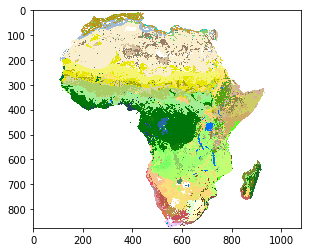

In [56]:
plt.imshow(data, cmap=color_map);

### plot with cartopy

In [57]:
extent_lonlat = (
    origin_x, 
    origin_x + (pixel_width * dataset.RasterXSize),
    origin_y + (pixel_height * dataset.RasterYSize),
    origin_y
)

In [58]:
crs_lonlat = ccrs.PlateCarree()

In [59]:
def plot_shiny_map(fn=None, dpi=150):
    subplot_kw = dict(projection=crs_lonlat)
    fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)
    ax.set_extent(extent_lonlat, crs=crs_lonlat)
    ax.imshow(data, cmap=color_map, extent=extent_lonlat, origin='upper')
    ax.coastlines(resolution='50m', linewidth=2)
    ax.add_feature(cfeature.BORDERS, linewidth=2)

    for pop, lat, lon, offset_lat, offset_lon, num, pos in zip(list(df['pop']), list(df.lat), list(df.lon), list(df.offset_lat), list(df.offset_lon), list(df.num), list(df.label)):
            centre = (lon + offset_lon, lat + offset_lat)
            if num < 25:
                radius = 0.5
            elif num < 50:
                radius = 0.75
            elif num < 75:
                radius = 1
            elif num < 100:
                radius = 1.25
            elif num < 125:
                radius = 1.50
            else:
                radius = 2
            ax.add_patch(plt.Circle(xy=centre, radius=radius, edgecolor='k', linewidth=2.5, facecolor=pop_colors[pop], zorder=7))

            if offset_lat != 0 or offset_lon != 0:
                ax.plot([lon, lon + offset_lon],
                        [lat, lat + offset_lat], 'k-', lw=2.5)

            lbl = pop
            if pos == 'bottom':
                ax.text(centre[0], centre[1] + (radius + (0.1 * radius)), lbl, ha='center', va='bottom', fontsize=14, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)
            if pos == 'top':
                ax.text(centre[0], centre[1] - (radius + (0.1 * radius)), lbl, ha='center', va='top', fontsize=14, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)

    ax.set_extent([-24, 46, -14, 15])

    handles = [mpl.patches.Patch(facecolor=pop_colors[k], edgecolor='k', label=df[df['pop'] == k].long.values[0]) for k in list(pop_col)]
    #handles = [mpl.patches.Patch(facecolor=hap_colors[k], edgecolor='k', label=human_hap_labels[k]) for k in hap_label
    leg = ax.legend(handles=handles, bbox_to_anchor=(-0.0009, 0.38), loc='upper left', title='Population', ncol=2, fontsize=14 )
    leg.get_title().set_fontsize('16')
    leg.get_title().set_fontweight('bold')
    leg._legend_box.align = "center"
    if fn:
        fig.savefig(fn, jpeg_quality=100, dpi=dpi, bbox_inches='tight');

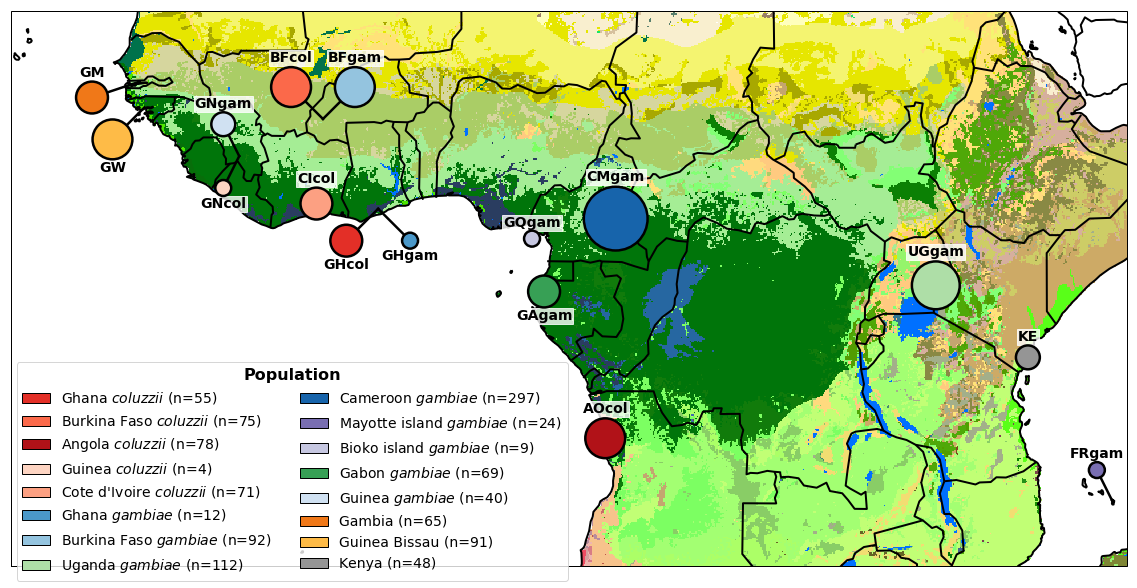

In [61]:
plot_shiny_map(fn='../artwork/collection_site_map.jpg', dpi=150)